# Project: Gene Expression Analysis and Classifcation using Machine Learning Approch
## Data set decription
This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD.


#### License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.


# Student Info

- Student Name: Sahana Deepak

- Roll No: 212244814

- Email: [emial](mailto:sdeepak1@toromail.csudh.edu) contact for queries

### Data Collection

In [1]:
# Essential libraries for data handling
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For drawing attractive and informative statistical graphics

# Specific tools for advanced plotting
import matplotlib.gridspec as gridspec  # For creating a grid of subplots
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Import necessary libraries for PCA and data scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Miscellaneous
import os  # For interacting with the operating system
import time

In [2]:
# load the features dataset
features = pd.read_csv("C:/Users/Sahana Deepak/Documents/Project - Cancer Subtype Multi-Class Classification in Gene Expression Data/Data/TCGA-PANCAN-HiSeq-801x20531/data.csv",
                       header = 0, low_memory=False)

In [3]:
# load the lables data
labels = pd.read_csv("C:/Users/Sahana Deepak/Documents/Project - Cancer Subtype Multi-Class Classification in Gene Expression Data/Data/TCGA-PANCAN-HiSeq-801x20531/labels.csv",
                     header = 0, low_memory=False)

In [4]:
# check the features data
features

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [5]:
# check the labels data
labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


## Initial Data Preprocessing
- Performing initial data perprocessing

In [6]:
#Checking the data type
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [7]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    object
 1   Class       801 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [8]:
#Checking for null values
features.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20532, dtype: int64

In [9]:
labels.isnull().sum()

Unnamed: 0    0
Class         0
dtype: int64

### Interpretation: 
- Dataset Shape: 801 rows × 20532 columns
- Missing Values: No missing values present

### Performing  Exploratory Data Analysis (EDA)

## Statistical Analysis

In [10]:
# Summary statistics for the gene expression data
features.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [11]:
# Correlation matrix
correlation_matrix = features.corr()
correlation_matrix

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
gene_0,1.000000,0.024111,0.027117,-0.080269,-0.028969,NaN,0.051855,-0.053647,-0.024423,-0.012785,...,-0.021109,-0.064341,-0.013874,-0.008384,-0.036623,0.034314,-0.000368,-0.049142,0.041554,-0.027767
gene_1,0.024111,1.000000,0.533902,0.148348,-0.158555,NaN,0.202855,0.177154,0.023411,0.006425,...,0.169172,0.190145,0.313725,-0.007284,0.123178,-0.255093,0.303771,0.247959,-0.067474,0.034348
gene_2,0.027117,0.533902,1.000000,0.075988,-0.125376,NaN,0.334900,0.136246,0.013228,-0.045725,...,-0.021067,0.036411,0.242255,0.018755,-0.054584,-0.160446,0.163181,0.066709,0.011765,0.075604
gene_3,-0.080269,0.148348,0.075988,1.000000,0.153666,NaN,-0.007905,-0.084841,-0.033180,0.002434,...,-0.186729,-0.014547,-0.011733,-0.242855,-0.240551,0.092787,-0.000379,0.016733,-0.135829,0.023476
gene_4,-0.028969,-0.158555,-0.125376,0.153666,1.000000,NaN,-0.044347,-0.156698,0.082124,0.098267,...,-0.499208,-0.167764,-0.283480,0.179406,-0.367551,0.011739,-0.434604,-0.108036,-0.007229,0.062752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene_20526,0.034314,-0.255093,-0.160446,0.092787,0.011739,NaN,0.034257,-0.087913,-0.023098,0.045096,...,-0.266999,-0.348636,-0.283602,-0.217210,-0.261564,1.000000,-0.101292,-0.297921,0.110060,-0.047482
gene_20527,-0.000368,0.303771,0.163181,-0.000379,-0.434604,NaN,0.106230,0.159428,-0.064293,-0.002198,...,0.433144,0.302748,0.448078,-0.127397,0.197762,-0.101292,1.000000,0.190374,0.087528,-0.068362
gene_20528,-0.049142,0.247959,0.066709,0.016733,-0.108036,NaN,-0.135111,0.083252,-0.054051,0.073503,...,0.345210,0.413114,0.250467,0.225442,0.526923,-0.297921,0.190374,1.000000,0.055909,-0.050641
gene_20529,0.041554,-0.067474,0.011765,-0.135829,-0.007229,NaN,0.039222,-0.010877,-0.002941,0.000634,...,0.039898,0.054090,0.050103,0.200403,0.073156,0.110060,0.087528,0.055909,1.000000,0.017558


## Visual Analysis

In [12]:
# Set global aesthetics using seaborn style for consistency and a professional look
plt.style.use('seaborn')
# Configure global font settings for readability
plt.rc('font', family='Arial', size=14)

In [13]:
# Check the distribution of "Class" column
labels['Class'].describe()

count      801
unique       5
top       BRCA
freq       300
Name: Class, dtype: object

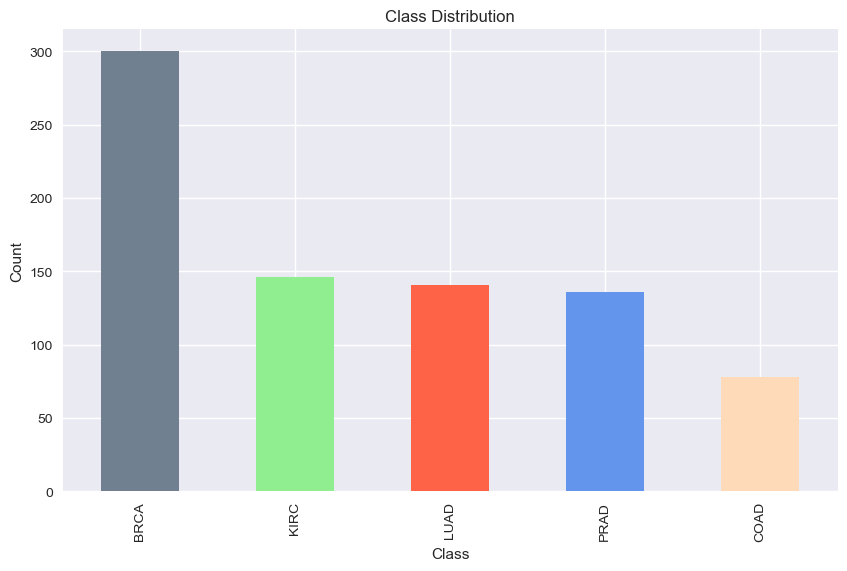

In [14]:
# Calculate class frequencies
class_counts = labels['Class'].value_counts()

# Define a color palette for the bar chart
colors = ['slategray', 'lightgreen', 'tomato', 'cornflowerblue', 'peachpuff']

# Initialize a figure with a specified size
plt.figure(figsize=(10, 6))

# Create a bar chart to display the distribution of classes
class_counts.plot(kind='bar', color=colors, title='Class Distribution', xlabel='Class', ylabel='Count')

# Rotate the x-axis labels to 90 degrees for better readability
plt.xticks(rotation=90)

# Save the generated figure to a file with high resolution and tight layout
plt.savefig('label-counts.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

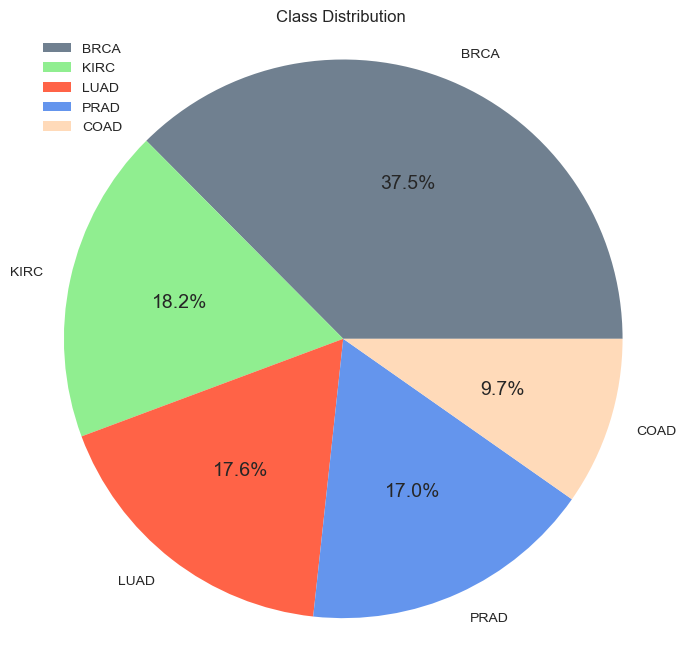

In [15]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors = colors)
plt.title('Class Distribution')

# Display the chart with a legend
plt.legend(class_counts.index, loc='best')
plt.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.

# Save the figure
plt.savefig('Class-distribution-pie-plot.png', dpi=300, bbox_inches='tight')

plt.show()



### Interpretation: 

The dataset distribution of samples across several classes is displayed in the data, where each class is denoted by a label. This is an examination of the data:

1. **Class Distribution**: - The samples in the dataset are categorized into five groups, denoted by the names COAD, PRAD, KIRC, LUAD, and BRCA.

   - With 300 instances, the class "BRCA" has the most samples, making it the most common class in the dataset. The remaining classes are COAD (78 samples), PRAD (136 samples), KIRC (146 samples), and LUAD (141 samples), in decreasing order of sample count.

2. **Imbalance Dataset**: - The dataset clearly displays class imbalance, with some classes having noticeably more samples than others. The effectiveness of machine learning models may be impacted by this and we will have to address this imbalance dataset problem



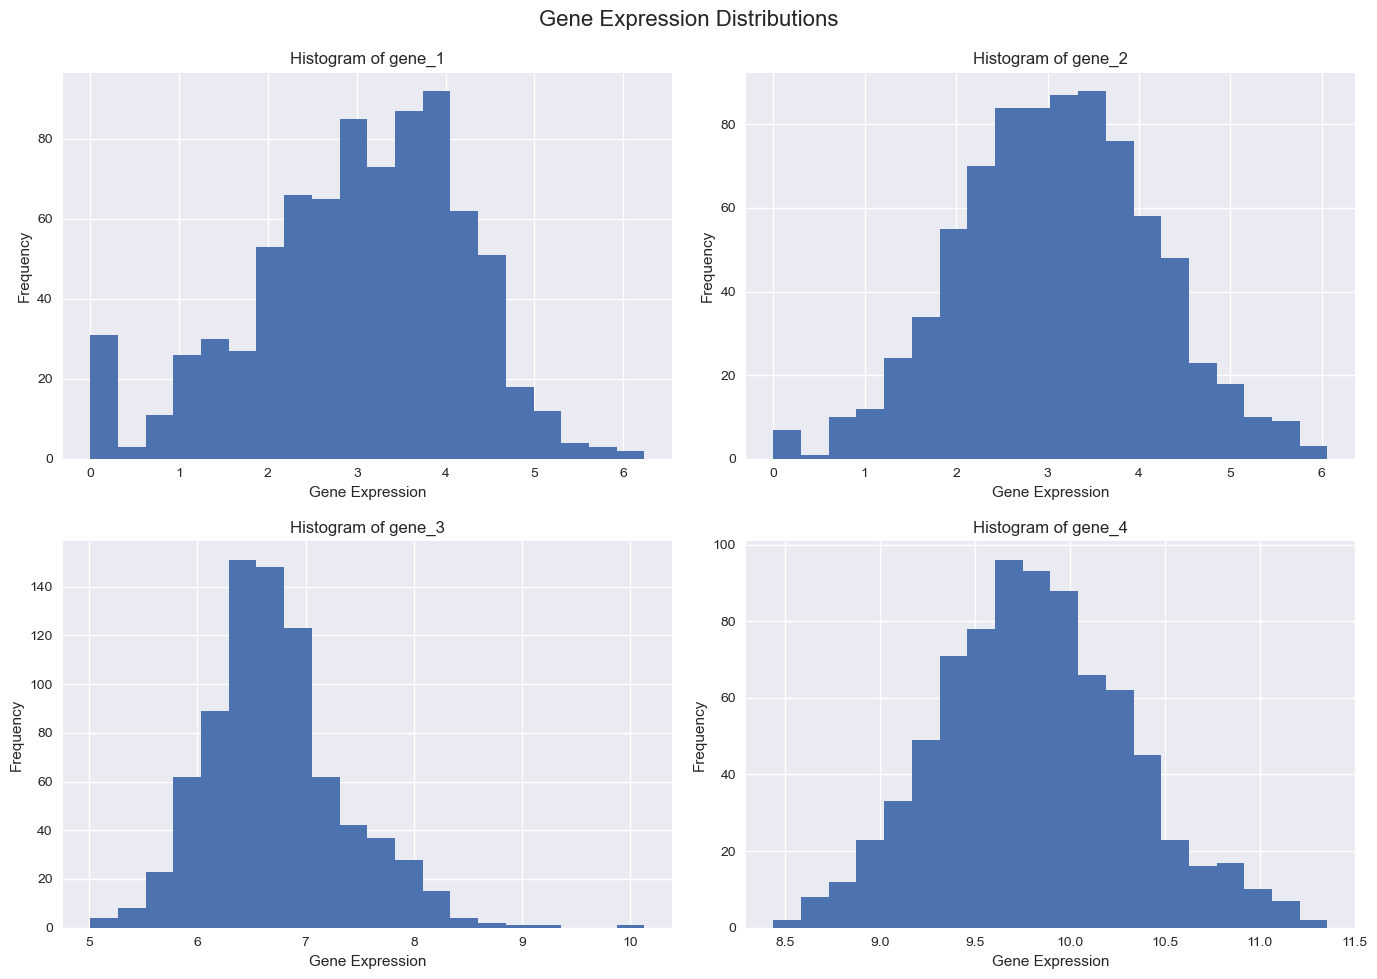

In [16]:
# Setting up the figure to hold 4 subplots in a 2x2 grid
plt.figure(figsize=(14, 10))

# Add a main title for the entire figure
plt.suptitle('Gene Expression Distributions', fontsize=16)

# Subplot 1 for gene_1
plt.subplot(2, 2, 1)  # This means 2 rows, 2 columns, position 1
features['gene_1'].hist(bins=20)
plt.title('Histogram of gene_1')
plt.xlabel('Gene Expression')
plt.ylabel('Frequency')

# Subplot 2 for gene_2
plt.subplot(2, 2, 2)  # This means 2 rows, 2 columns, position 2
features['gene_2'].hist(bins=20)
plt.title('Histogram of gene_2')
plt.xlabel('Gene Expression')
plt.ylabel('Frequency')

# Subplot 3 for gene_3
plt.subplot(2, 2, 3)  # This means 2 rows, 2 columns, position 3
features['gene_3'].hist(bins=20)
plt.title('Histogram of gene_3')
plt.xlabel('Gene Expression')
plt.ylabel('Frequency')

# Subplot 4 for gene_4
plt.subplot(2, 2, 4)  # This means 2 rows, 2 columns, position 4
features['gene_4'].hist(bins=20)
plt.title('Histogram of gene_4')
plt.xlabel('Gene Expression')
plt.ylabel('Frequency')

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Save the figure
plt.savefig('genes_distributions_histogram.png', dpi=300, bbox_inches='tight')
# Display the figure
plt.show()

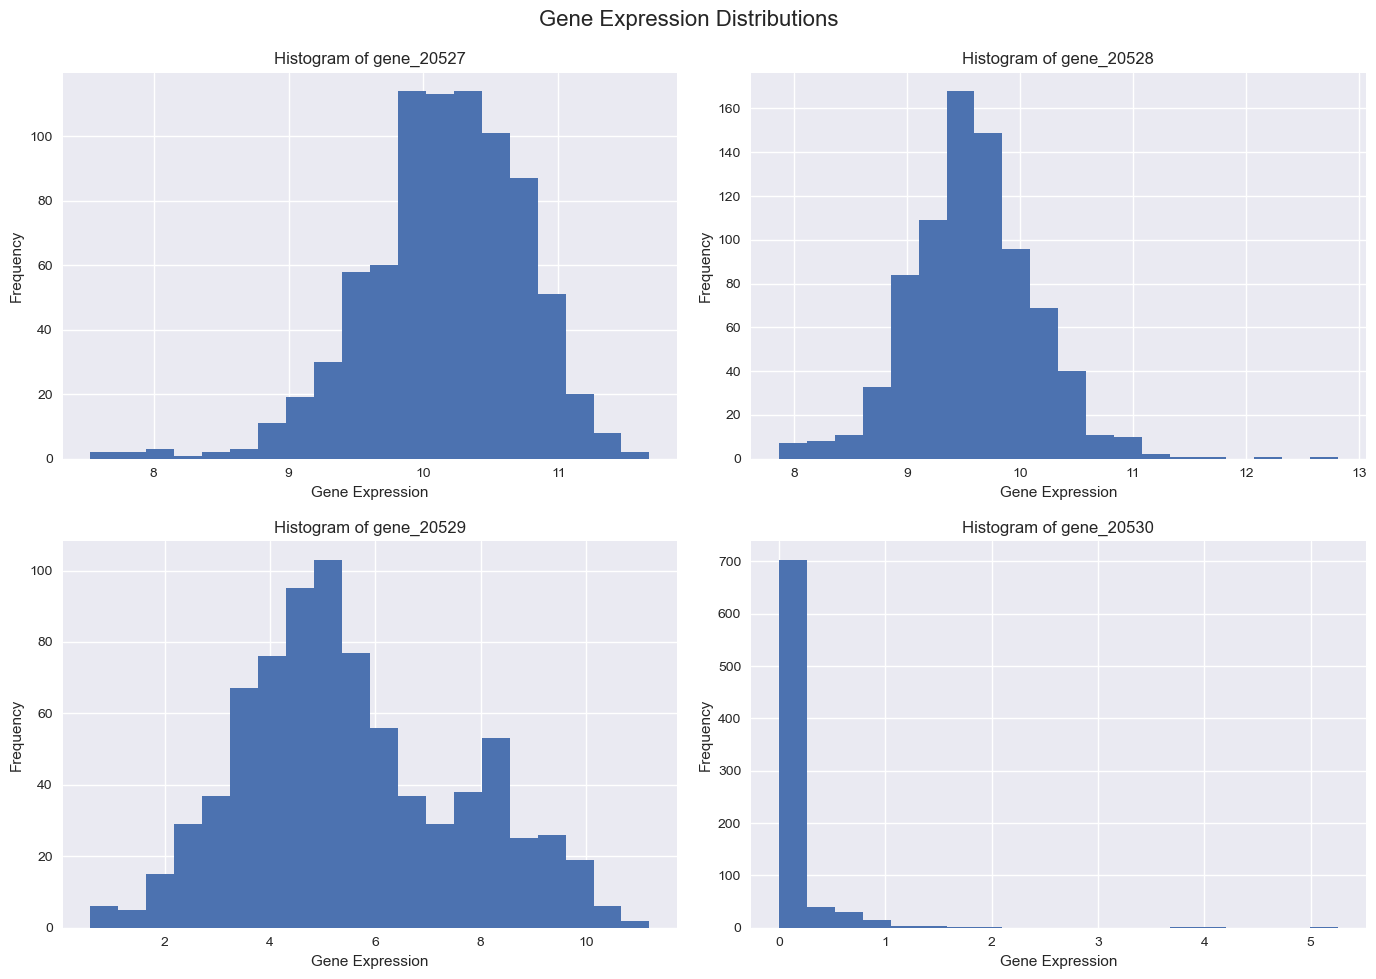

In [17]:
# Setting up the figure to hold 4 subplots in a 2x2 grid
plt.figure(figsize=(14, 10))

# Add a main title for the entire figure
plt.suptitle('Gene Expression Distributions', fontsize=16)

# Subplot 1 for gene_1
plt.subplot(2, 2, 1)  # This means 2 rows, 2 columns, position 1
features['gene_20527'].hist(bins=20)
plt.title('Histogram of gene_20527')
plt.xlabel('Gene Expression')
plt.ylabel('Frequency')

# Subplot 2 for gene_2
plt.subplot(2, 2, 2)  # This means 2 rows, 2 columns, position 2
features['gene_20528'].hist(bins=20)
plt.title('Histogram of gene_20528')
plt.xlabel('Gene Expression')
plt.ylabel('Frequency')

# Subplot 3 for gene_3
plt.subplot(2, 2, 3)  # This means 2 rows, 2 columns, position 3
features['gene_20529'].hist(bins=20)
plt.title('Histogram of gene_20529')
plt.xlabel('Gene Expression')
plt.ylabel('Frequency')

# Subplot 4 for gene_4
plt.subplot(2, 2, 4)  # This means 2 rows, 2 columns, position 4
features['gene_20530'].hist(bins=20)
plt.title('Histogram of gene_20530')
plt.xlabel('Gene Expression')
plt.ylabel('Frequency')

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Save the figure
plt.savefig('genes_distributions_histogram.png', dpi=300, bbox_inches='tight')
# Display the figure
plt.show()

### Interpretation:
- Roughly Normal Distribution: The histograms reflect that the first two and the forth gene features follow a roughly normal distribution while the 3rd gene is slightly postively skewed and the gene_20530 is extremely postively skewed.
- The address the skewed distribution problem we will have to perform feature engineering for better results

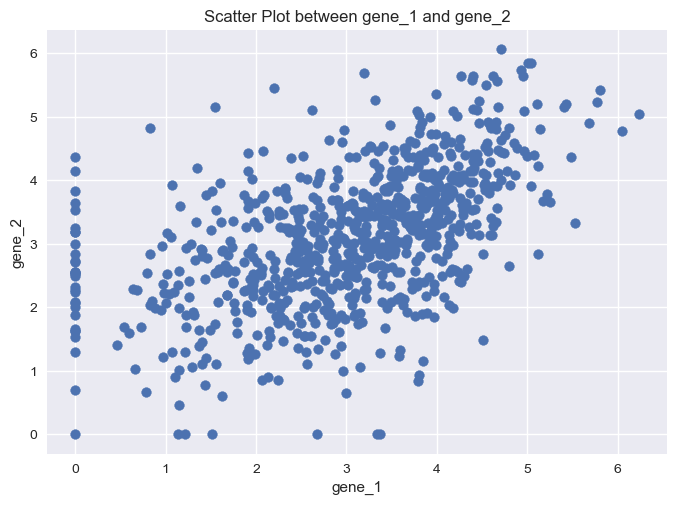

In [18]:
# plotting a scatter plot between gene_1 and gene_2 to check the relation
plt.scatter(features['gene_1'], features['gene_2'])
plt.title('Scatter Plot between gene_1 and gene_2')
plt.xlabel('gene_1')
plt.ylabel('gene_2')
# Save the figure
plt.savefig('gene1_and_gene2_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

### Interpretation:
- The above scatter plot reveals that gene1 and gene2 are in moderate positive relation as indicated by the correlation matrix.

### PCA Analysis

In [19]:
features.drop(['Unnamed: 0'], inplace=True, axis=1)
labels.drop(['Unnamed: 0'],inplace=True, axis=1)

In [20]:
pca3 = PCA(n_components=3).fit(features)
features_reduced = pca3.transform(features)
features_reduced

array([[-62.75541522, -94.07197345,  89.5198312 ],
       [ -2.43289636,  90.5858419 ,  -1.06730783],
       [-71.26685285,  -8.06460783,  66.1124547 ],
       ...,
       [ 10.48626145,  21.57059457,  41.34587854],
       [-55.06360486, -92.39477802,  80.05003938],
       [-49.10303379, -50.99763909,  40.50375448]])

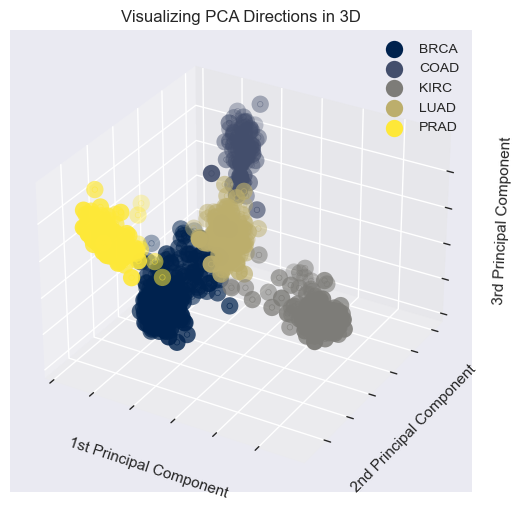

In [21]:
# Extract class labels
category_labels = labels['Class'].to_numpy()  # Convert to NumPy array for consistency

# Map categories to numerical labels
category_unique = np.unique(category_labels)
category_map = {label: i for i, label in enumerate(np.unique(category_labels))}
numerical_categories = np.array([category_map[label] for label in category_labels])

# Prepare visualization
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')  # Create 3D subplot directly

# Create a color palette for visual distinction
colors = plt.cm.get_cmap('cividis', len(np.unique(category_labels)))

# Iterate through unique categories and plot data points
for category_index in np.unique(numerical_categories):
    data_indices = numerical_categories == category_index

    ax.scatter(
        features_reduced[data_indices, 0],
        features_reduced[data_indices, 1],
        features_reduced[data_indices, 2],
        c=[colors(category_index / len(np.unique(category_labels)))], 
        label=f'{category_unique[category_index]}',
        linewidths=8  # linewidths
    )

# Customize plot elements
ax.set_title("Visualizing PCA Directions in 3D")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
ax.w_xaxis.set_ticklabels([])  # Hide tick labels for clarity
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# Add legend and display the plot
ax.legend()
plt.show()

### Interpretion:
The PCA-3 visualization reveals distinct clusters corresponding to each tumor class, reflecting a visbile separation in the gene expression patterns. This indicates the potential for training predictive models to classify genes into their respective tumor classes or for performing clustering analysis on the gene data.

## Model Building and Evaluation

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
def initialize_classifiers():
    # Initialize the classifiers
    classifiers = [
        ('Logistic Regression', LogisticRegression(max_iter=1000)),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Random Forest', RandomForestClassifier(random_state=42)),
        ('Support Vector Machine', SVC(probability=True, random_state=42)),
        ('Gradient Boosting', GradientBoostingClassifier(n_estimators=10, random_state=42))
    ]
    return classifiers

In [24]:
def train_and_evaluate_models(classifiers, X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classifiers using the provided training and testing data.

    Parameters:
    classifiers (list(dict)): A list of dictionary containing names and classifier objects.
    X_train (array-like): Training data features.
    X_test (array-like): Testing data features.
    y_train (array-like): Training data labels.
    y_test (array-like): Testing data labels.

    Returns:
    tuple: A tuple containing confusion matrices, accuracy scores, precision scores, recall scores,
    and F1 scores for each classifier.
    """
    confusion_matrices = {}
    accuracy_scores = {}
    precision_scores = {}
    recall_scores = {}
    f1_scores = {}
    training_times = {}
    total_times = {}

    for name, classifier in classifiers:
        # Training the classifier
        print(f'---- Training {name} Model ----')
        start_time = time.time()  # Start timing
        classifier.fit(X_train, y_train)
        end_time = time.time()  # End timing
        training_time = end_time - start_time
        training_times[name] = training_time
        print(f'\tTraining Time: {training_time}')
        
        # Predicting labels on the test data
        y_pred = classifier.predict(X_test)
        
        # Calculating evaluation metrics
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[name] = cm
        accuracy_scores[name] = accuracy_score(y_test, y_pred)
        precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
        recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
        f1_scores[name] = f1_score(y_test, y_pred, average='weighted')
        
        total_time = time.time() - start_time
        total_times[name] = total_time
        model_results = {
        'accuracy_score': accuracy_scores[name],
        'precision_score': precision_scores[name],
        'recall_score': recall_scores[name],
        'f1_score': f1_scores[name],
        'total_time': total_time
        }
        print(f'Model Results: {model_results}')
    
    print('Models Training and Evaluation Measures Complete.')

    return accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices, training_times, total_times

In [25]:
def plot_mertics(classifiers, outputGraphName):
    # Custom colors for each classifier
    color_palette = plt.cm.get_cmap('tab20').colors[:len(classifiers)]

    # Define the width between bars
    bar_width = 0.15

    fig, axs = plt.subplots(figsize=(10, 6))

    # Iterate through classifiers
    for i, (model, model_name) in enumerate(classifiers):
        model_scores = []
        model_scores.append(accuracy_scores.get(model))
        model_scores.append(precision_scores.get(model))
        model_scores.append(recall_scores.get(model))
        model_scores.append(f1_scores.get(model))
        x_position = np.arange(len(model_scores)) + (i * bar_width)
        barplot = axs.bar(x_position, model_scores, bar_width, color=color_palette[i], label=model_name)
        for bar in barplot:
            height = bar.get_height()
            axs.annotate('{}'.format(round(height, 2)),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

    # Add labels, legends, and titles
    axs.set_xticks(np.arange(len(model_scores)) + ((len(classifiers) - 1) * bar_width) / 2)
    axs.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(classifiers)//2)  # Adjust the legend location
    plt.title('Model Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
    plt.ylim(0, 1.1)  # Set y-axis limit
    plt.tight_layout()
    plt.savefig(f"{outputGraphName}_models_evaluation.png", dpi=300, bbox_inches='tight')
    plt.show()
    print(f"{outputGraphName}_models_evaluation.png successfully saved.")

In [26]:
def generate_report(classifier_name, accuracy, precision, recall, f1, classifier):
    print(f"------- {classifier_name.upper()} Detailed Classification Report -------")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Display classification report
    print("Classification Report:")
    print(classification_report(y_test, classifier.predict(X_test)))

In [27]:
def plot_training_times(training_times):
    """
    Plots the training time comparison of different models.

    Parameters:
    training_times (dict): A dictionary containing model names as keys and their corresponding training times as values.
    """
    plt.figure(figsize=(10, 6))
    models = list(training_times.keys())
    times = list(training_times.values())
    color_palette = plt.cm.get_cmap('tab20').colors[:len(classifiers)]
    
    for i, (model, time) in enumerate(zip(models, times)):
        plt.bar(model, time, color=color_palette[i], label=f'{model}: {time:.2f} sec')
        plt.text(i, time + 0.5, f'{time:.2f}', ha='center', va='bottom', fontsize=8)

    plt.xlabel('Model')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time Comparison of Models')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [28]:
def generate_metrics_df():
    # Create a DataFrame
    metrics_df = pd.DataFrame({
        'Accuracy': accuracy_scores.values(),
        'Precision': precision_scores.values(),
        'Recall': recall_scores.values(),
        'F1 Score': f1_scores.values()
    }, index=accuracy_scores.keys())

    return metrics_df.sort_values(by=list(metrics_df.columns),ascending=False)

### Training Models on Original Data

In [29]:
y_labels = labels['Class']
y_labels

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

In [30]:
classifiers = initialize_classifiers()
classifiers

[('Logistic Regression', LogisticRegression(max_iter=1000)),
 ('K-Nearest Neighbors', KNeighborsClassifier()),
 ('Random Forest', RandomForestClassifier(random_state=42)),
 ('Support Vector Machine', SVC(probability=True, random_state=42)),
 ('Gradient Boosting',
  GradientBoostingClassifier(n_estimators=10, random_state=42))]

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y_labels, test_size=0.2, random_state=42, stratify=y_labels)

In [32]:
X_train

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
391,0.00000,4.094565,4.704501,7.545559,9.752299,0.0,8.595821,0.859970,0.0,0.0,...,4.598568,7.654557,10.089887,7.107677,8.832156,12.816038,9.317229,9.461801,9.258929,0.0
148,0.00000,6.237034,5.043235,6.297397,10.391415,0.0,7.669941,0.913033,0.0,0.0,...,5.669299,8.437523,10.524503,1.467801,9.666187,11.258572,10.062033,9.018030,7.737159,0.0
595,0.00000,3.028304,2.156138,6.459537,9.488378,0.0,5.319195,0.000000,0.0,0.0,...,6.436851,8.557640,9.749657,5.406037,10.590297,11.449572,9.303614,9.228160,4.403943,0.0
770,0.00000,2.706995,3.574586,6.090422,9.557619,0.0,7.162452,0.467175,0.0,0.0,...,6.261474,9.005094,9.897212,6.405101,9.971630,12.057508,9.898369,9.835752,4.649144,0.0
493,0.54201,3.522621,3.463021,8.266037,10.431341,0.0,7.536667,0.000000,0.0,0.0,...,4.848788,8.581671,9.682631,0.542010,8.867365,12.051070,10.181786,8.857471,2.792439,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.00000,2.248140,2.064469,5.571892,9.174441,0.0,6.343960,0.000000,0.0,0.0,...,6.581330,8.923886,10.151156,5.059900,10.249125,11.489572,10.207441,9.586791,2.862590,0.0
92,0.00000,2.434722,2.782031,6.496082,9.279037,0.0,7.203211,0.000000,0.0,0.0,...,6.523264,9.388672,10.173027,5.970598,9.828498,12.170607,10.957349,9.549627,5.369749,0.0
728,0.00000,1.515460,0.000000,7.409603,11.138246,0.0,7.211022,0.389347,0.0,0.0,...,4.942144,8.200080,10.349834,4.852159,8.836192,11.808224,9.351286,9.364229,2.966412,0.0
356,0.00000,1.894294,1.276616,6.709180,10.268647,0.0,5.970939,0.000000,0.0,0.0,...,6.126698,8.750901,9.903457,6.588268,9.676773,11.403113,10.041755,9.422029,4.388692,0.0


In [33]:
y_train

391    BRCA
148    LUAD
595    KIRC
770    BRCA
493    COAD
       ... 
399    KIRC
92     BRCA
728    BRCA
356    BRCA
768    BRCA
Name: Class, Length: 640, dtype: object

In [34]:
accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices, training_times, total_times = train_and_evaluate_models(classifiers, 
                                                                                                            X_train, 
                                                                                                            X_test, 
                                                                                                            y_train, 
                                                                                                            y_test)

---- Training Logistic Regression Model ----
	Training Time: 9.980674266815186
Model Results: {'accuracy_score': 0.9937888198757764, 'precision_score': 0.9938906425007638, 'recall_score': 0.9937888198757764, 'f1_score': 0.993758020635491, 'total_time': 10.331000804901123}
---- Training K-Nearest Neighbors Model ----
	Training Time: 0.34107208251953125


C:\Users\Public\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model Results: {'accuracy_score': 0.9937888198757764, 'precision_score': 0.9938906425007638, 'recall_score': 0.9937888198757764, 'f1_score': 0.993758020635491, 'total_time': 0.8624768257141113}
---- Training Random Forest Model ----
	Training Time: 5.986969470977783
Model Results: {'accuracy_score': 0.9875776397515528, 'precision_score': 0.9879783610498898, 'recall_score': 0.9875776397515528, 'f1_score': 0.9874494186682355, 'total_time': 6.274438142776489}
---- Training Support Vector Machine Model ----
	Training Time: 18.408114194869995
Model Results: {'accuracy_score': 0.9875776397515528, 'precision_score': 0.9876794623765401, 'recall_score': 0.9875776397515528, 'f1_score': 0.9875031254605398, 'total_time': 20.764256238937378}
---- Training Gradient Boosting Model ----
	Training Time: 308.0815052986145
Model Results: {'accuracy_score': 0.968944099378882, 'precision_score': 0.9713330148112757, 'recall_score': 0.968944099378882, 'f1_score': 0.9685094708937626, 'total_time': 308.4237978

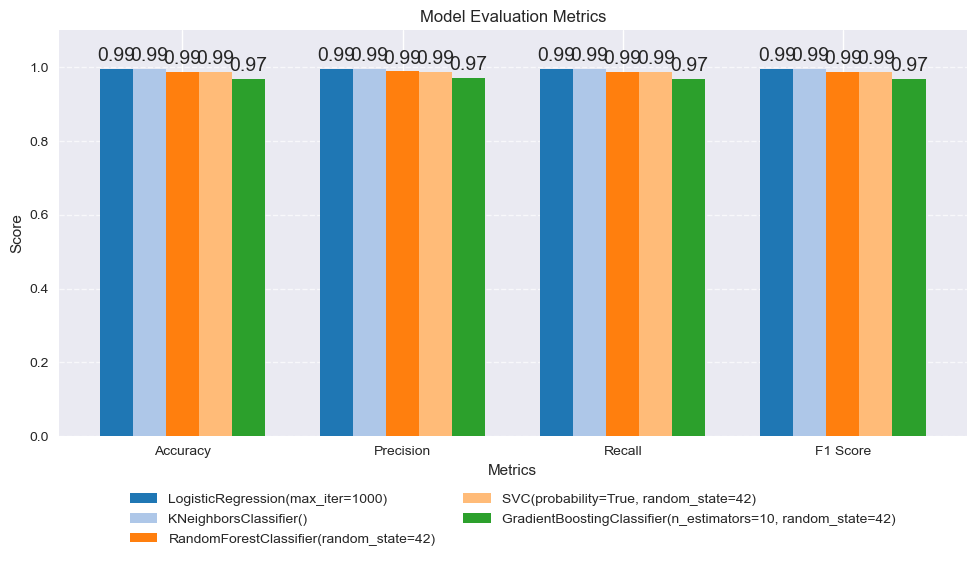

gene-classification-model-comparision_models_evaluation.png successfully saved.


In [35]:
plot_mertics(classifiers, "gene-classification-model-comparision")

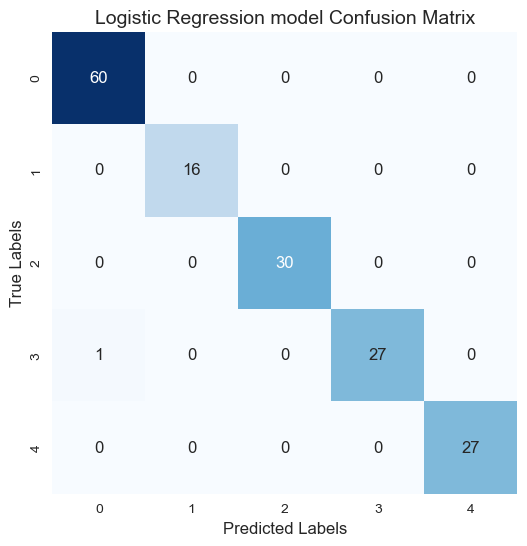

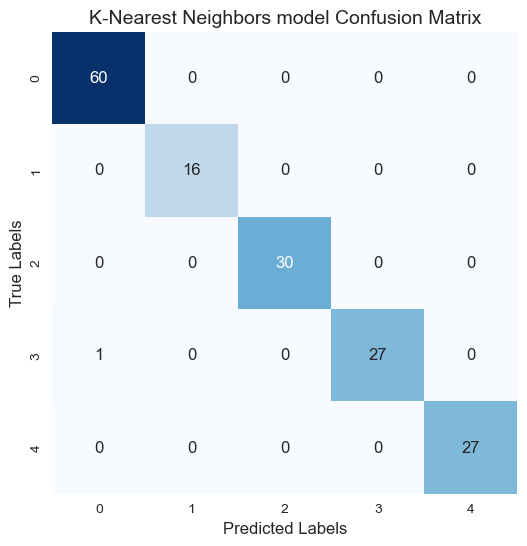

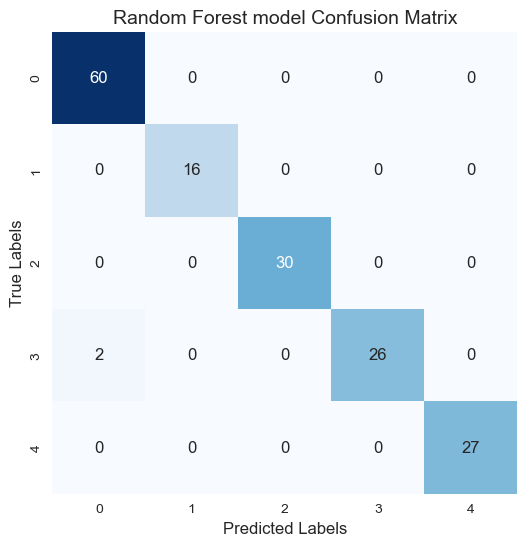

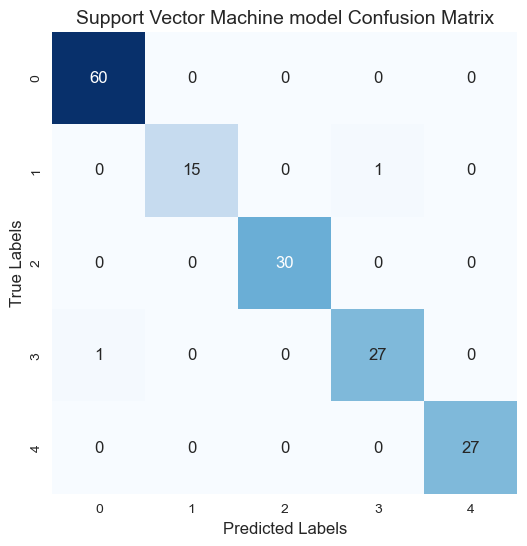

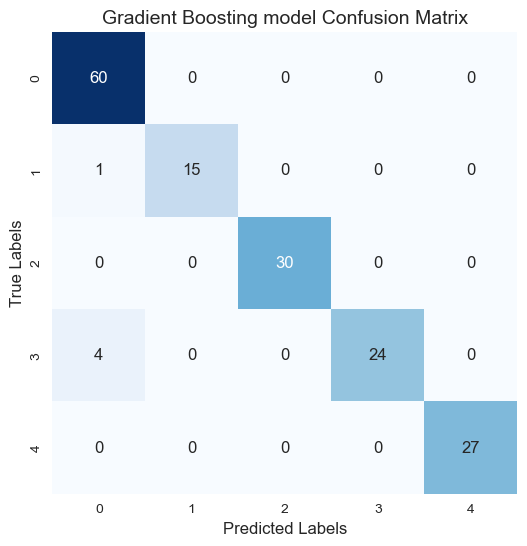

In [36]:
# Plot the confusion matrices
font_size = 12
annot_kws = {"size": font_size}
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws=annot_kws)
    # Customize the font size using plt
    plt.title(f'{name} model Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.savefig(f"{name}-model-Confusion-Matrix.png",dpi=300,bbox_inches='tight')
    plt.show()

In [37]:
for name, classifier in classifiers:
    generate_report(name, accuracy_scores[name], 
                    precision_scores[name], recall_scores[name], f1_scores[name], classifier)

------- LOGISTIC REGRESSION Detailed Classification Report -------
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Classification Report:
              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161

------- K-NEAREST NEIGHBORS Detailed Classification Report -------
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Classification Report:


C:\Users\Public\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161

------- RANDOM FOREST Detailed Classification Report -------
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Classification Report:
              precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.93      0.96        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.9

**Note:**
- The models are already exibiting exceptional accuracy scores, there is no need for further model optimization.

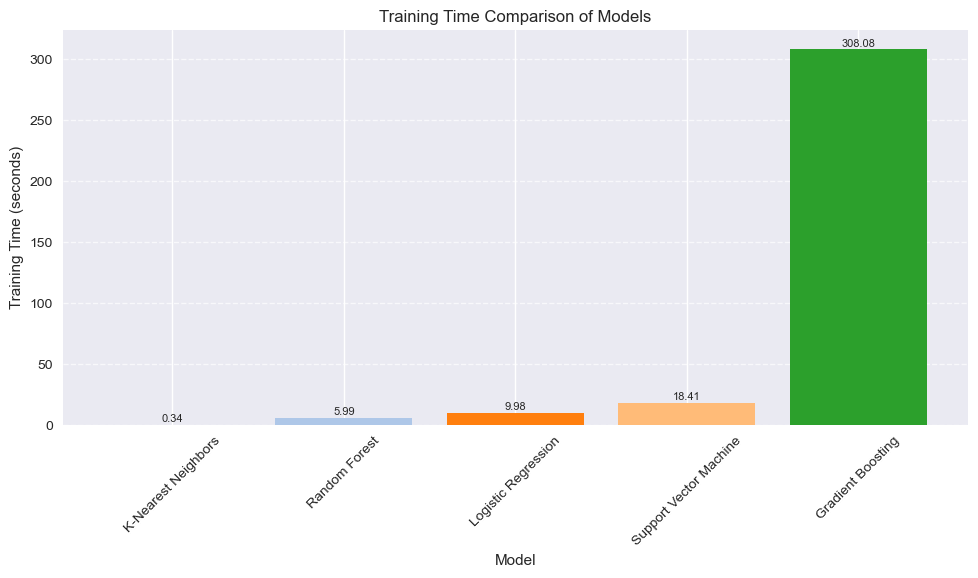

In [38]:
plot_training_times(training_times=dict(sorted(training_times.items(), key=lambda x: x[1])))

The training time analysis results for the models are as follows:

1. **K-Nearest Neighbors (KNN):**
   - Training Time: 0.34 seconds
   - KNN has the shortest training time among all the models, indicating its efficiency in learning from the data and making predictions quickly.

2. **Random Forest:**
   - Training Time: 5.99 seconds
   - Random Forest also demonstrates a relatively short training time, making it suitable for applications where training time is a consideration, but with higher complexity compared to KNN.

3. **Logistic Regression:**
   - Training Time: 9.98 seconds
   - Logistic Regression shows a moderate training time, which is expected as it's a simpler model compared to Random Forest and SVM.

4. **Support Vector Machine (SVM):**
   - Training Time: 18.41 seconds
   - SVM requires considerably more time for training compared to the previous models. This is because SVM optimizes a complex decision boundary, which may involve solving a large quadratic programming problem.

5. **Gradient Boosting:**
   - Training Time: 308.08 seconds
   - Gradient Boosting exhibits the longest training time among all the models. This is expected as Gradient Boosting trains sequentially and builds on the mistakes of previous trees, making it more computationally intensive.

Overall, the models vary significantly in their training times, with KNN being the fastest and Gradient Boosting being the slowest. The choice of model should consider the trade-off between training time and model performance.

### Best Performing Model:
- Logistic Regression

**Reasons:**
- Logistic Regression achieved the highest evaluation scores in terms of accuracy, precision, recall, and F1-score across all classes.
- It demonstrated an **accuracy of 0.99**, indicating its capability to predict the correct class for the majority of instances.
- Logistic Regression also showcased high precision, recall, and F1-scores for all classes, reflecting its effectiveness in correctly identifying instances belonging to each class while minimizing false positives and false negatives.
- Moreover, Logistic Regression exhibited a moderate training time compared to other models such as Support Vector Machine and Gradient Boosting, making it computationally efficient and suitable for practical applications where resources are limited.